# Hypothesis tests

Code to produce figures and examples to explain hypothesis testing.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

## Distributions

Used to explain distributions in hypothesis testing.

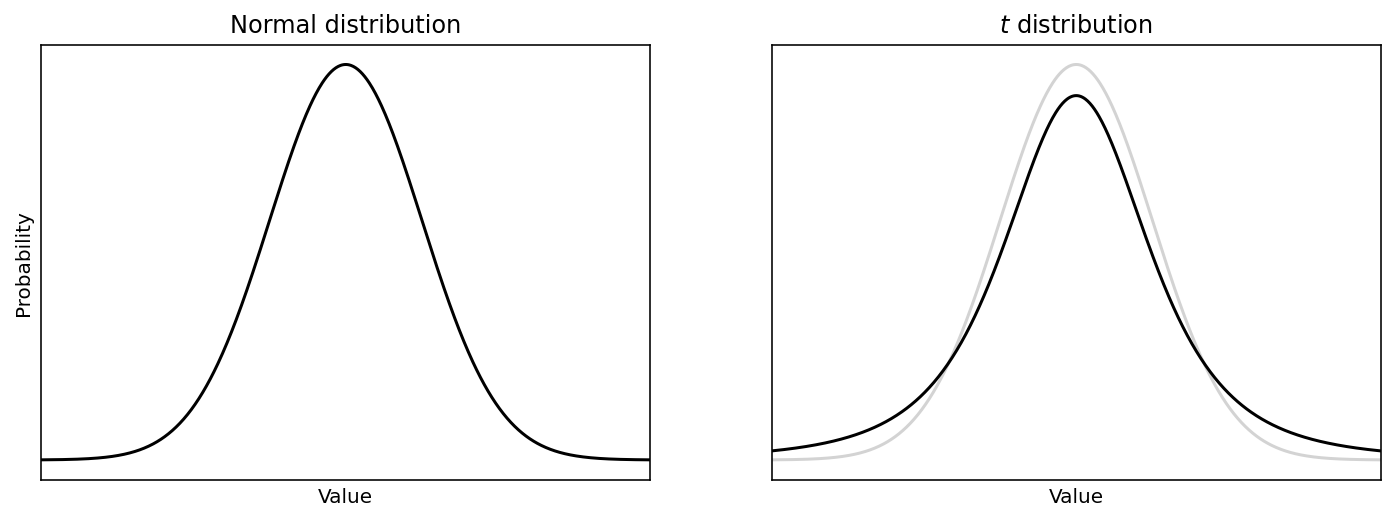

In [2]:
x = np.arange(-4, 4, 0.01)

norm = scipy.stats.norm.pdf(x)
t3 = scipy.stats.t.pdf(x, 3)

plt.subplots(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x, norm, color='black')
plt.xlim(-4, 4)
plt.xticks([])
plt.yticks([])
plt.title('Normal distribution')
plt.ylabel('Probability')
plt.xlabel('Value')

plt.subplot(1, 2, 2)
#plt.fill_between(x, t3, np.maximum(norm, t3), color='pink')
#plt.fill_between(x, t3, np.minimum(norm, t3), color='lightblue')

plt.plot(x, norm, color='lightgray')
plt.plot(x, t3, color='black')
plt.xlim(-4, 4)
plt.xticks([])
plt.yticks([])
plt.title('$t$ distribution')
plt.xlabel('Value')

plt.savefig('../fig/distributions.pdf')

## Illustration of income hypothesis test

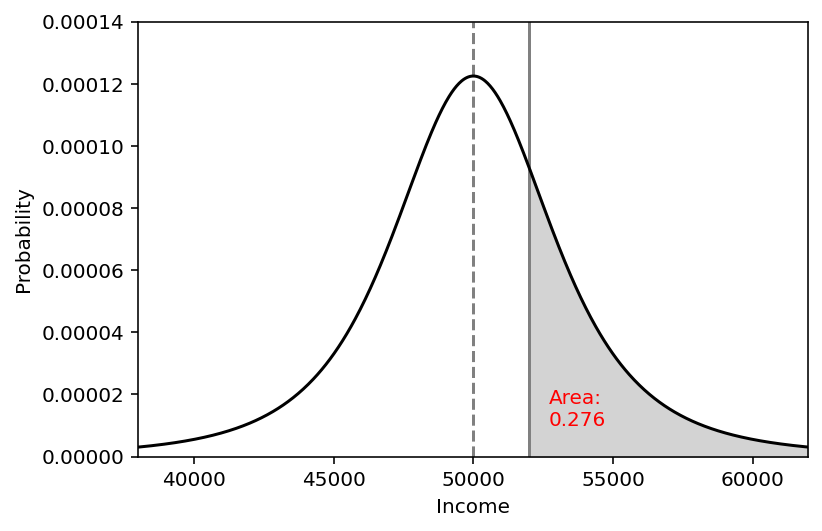

In [3]:
incx = x * 3000 + 50000 
t3inc = scipy.stats.t.pdf(incx, 3, 50000, 3000)

plt.subplots(figsize=(6, 4))
plt.axvline(50000, ls='--', color='gray')
plt.axvline(52000, color='gray')
plt.plot(incx, t3inc, color='black')
plt.xlabel('Income')
plt.ylabel('Probability')
plt.fill_between(incx[incx>=52000], t3inc[incx>=52000], color='lightgray')
plt.xlim(incx[0], incx[-1])
plt.ylim(0, 0.00014)
plt.savefig('../fig/incdistribution.pdf')
plt.text(52700, 1e-5, f'Area:\n{1 - scipy.stats.t.cdf(52000, 3, 50000, 3000):.3f}', color='red')
plt.savefig('../fig/incdistribution_area.pdf')


In [4]:
1 - scipy.stats.t.cdf(52000, 3, 50000, 3000)

0.27633715689030547

## Confidence intervals

[42452.66108414721, 61547.338915852786]

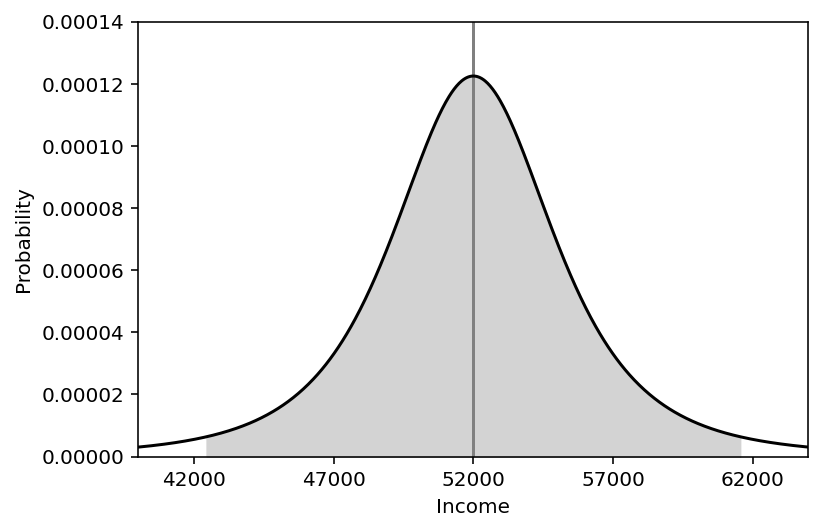

In [5]:
incx = x * 3000 + 52000
t3inc = scipy.stats.t.pdf(incx, 3, 52000, 3000)

plt.subplots(figsize=(6, 4))
plt.axvline(52000, color='gray')
plt.plot(incx, t3inc, color='black')
plt.xlabel('Income')
plt.ylabel('Probability')
plt.savefig('../fig/incdistribution.pdf')

low = scipy.stats.t.ppf(0.025, 3, 52000, 3000)
high = scipy.stats.t.ppf(0.975, 3, 52000, 3000)

plt.fill_between(incx[(incx >= low) & (incx <= high)], t3inc[(incx >= low) & (incx <= high)], color='lightgray')
plt.xlim(incx[0], incx[-1])
plt.ylim(0, 0.00014)
plt.savefig('../fig/confinterval.pdf')
plt.xticks([42000, 47000, 52000, 57000, 62000])
[low, high]